In [1]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score


In [2]:
# Load dataset
data_dict = pickle.load(open('./data.pickle', 'rb'))
data = np.asarray(data_dict['data'])
labels = np.asarray(data_dict['labels'])

In [3]:
# Split dataset (ensure the same split as training)
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels, random_state=42)

In [5]:
# Load trained model
model_path = "best_model.p"  # Change this to test different models
with open(model_path, 'rb') as f:
    model_data = pickle.load(f)
model = model_data['new_model']  # Use the correct key 'new_model'


In [6]:
y_predict = model.predict(x_test)

# Compute metrics
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

In [7]:
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 100.00%
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [8]:
print("Classification Report:")
print(classification_report(y_test, y_predict))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20
          17       1.00      1.00      1.00        20
          18       1.00      1.00      1.00        20
          19       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
          20       1.00      1.00      1.00        20
          21       1.00      1.00      1.00        20
          22       1.00      1.00      1.00        20
          23       1.00      1.00      1.00        20
    

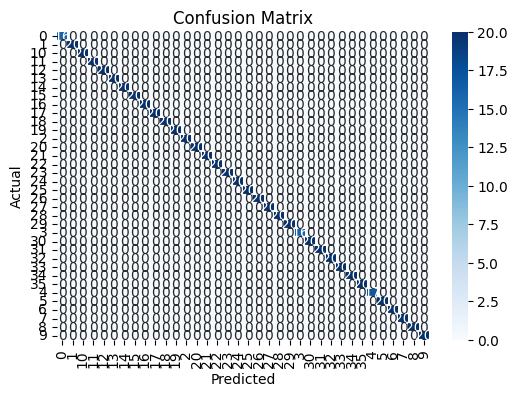

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(labels), yticklabels=np.unique(labels))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()